#📌 Extracão

In [4]:
import pandas as pd
import json

with open('TelecomX_Data.json', 'r', encoding='utf-8') as f:
    dados = json.load(f)

df = pd.json_normalize(dados)

df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='str')

#🔧 Transformação

In [9]:
df.columns = [col.split('.')[-1] for col in df.columns]

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [17]:
df.dropna(subset=['Churn'], inplace=True)

df['TotalCharges'] = df['TotalCharges'].fillna(0)

print("Valores nulos após a limpeza:")
print(df[['Churn', 'TotalCharges']].isnull().sum())

Valores nulos após a limpeza:
Churn           0
TotalCharges    0
dtype: int64


In [18]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

df = df.fillna("Não informado")

print("Correções aplicadas com sucesso!")
df.head()
df['SeniorCitizen'].value_counts()

Correções aplicadas com sucesso!


SeniorCitizen
No     6085
Yes    1182
Name: count, dtype: int64

In [19]:
df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Numeric
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,Não informado
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,Não informado
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Não informado
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Não informado
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Não informado


In [23]:
df['Contas_Diarias'] = df['MonthlyCharges'] / 30

df['Contas_Diarias'] = df['Contas_Diarias'].round(2)

print("Coluna 'Contas_Diarias' criada com sucesso!")
df[['MonthlyCharges', 'Contas_Diarias']].head()



Coluna 'Contas_Diarias' criada com sucesso!


,MonthlyCharges,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [ ]:
df['Contract'] = df['Contract'].replace({
    'Month-to-month': 'Mensal',
    'One year': 'Anual',
    'Two year': 'Bienal'
})

df['Churn_Binario'] = df['Churn'].replace({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].replace({'Female': 'Feminino', 'Male': 'Masculino'})

print("Tradução e conversão concluídas!")
df[['gender', 'Contract', 'Churn', 'Churn_Binario']].head()

Tradução e conversão concluídas!


,gender,Contract,Churn,Churn_Binario
0,Feminino,Anual,No,0
1,Masculino,Mensal,No,0
2,Masculino,Mensal,Yes,1
3,Masculino,Mensal,Yes,1
4,Feminino,Mensal,Yes,1


#📊 Carga e análise

In [ ]:

print(f"1. Tempo de Casa (tenure)")
print(f"   - Média: {df['tenure'].mean():.2f}")
print(f"   - Mediana: {df['tenure'].median():.2f}")

print("-" * 30)

print(f"2. Gasto Mensal (MonthlyCharges)")
print(f"   - Média: {df['MonthlyCharges'].mean():.2f}")
print(f"   - Mediana: {df['MonthlyCharges'].median():.2f}")

print("-" * 30)

print(f"3. Contas Diárias (Contas_Diarias)")
print(f"   - Média: {df['Contas_Diarias'].mean():.2f}")
print(f"   - Mediana: {df['Contas_Diarias'].median():.2f}")

print("-" * 30)

print(f"4. Desvio Padrão (Variação)")
print(f"   - Gasto Mensal (std): {df['MonthlyCharges'].std():.2f}")

1. Tempo de Casa (tenure)
   - Média: 32.35
   - Mediana: 29.00
------------------------------
2. Gasto Mensal (MonthlyCharges)
   - Média: 64.72
   - Mediana: 70.30
------------------------------
3. Contas Diárias (Contas_Diarias)
   - Média: 2.16
   - Mediana: 2.34
------------------------------
4. Desvio Padrão (Variação)
   - Gasto Mensal (std): 30.13


In [ ]:
df['Churn'] = df['Churn'].replace({'Yes': 'Saiu', 'No': 'Ficou'})

medias_gastos = df.groupby('Churn')['MonthlyCharges'].mean().round(2)
print("--- RELATÓRIO DE GASTOS MENSAIS ---")
print(f"Média de quem FICOU na empresa: R$ {medias_gastos['Ficou']}")
print(f"Média de quem SAIU da empresa: R$ {medias_gastos['Saiu']}")

print("-" * 35)

medias_tempo = df.groupby('Churn')['tenure'].mean().round(0).astype(int)

print("--- RELATÓRIO DE TEMPO DE CASA ---")
print(f"Tempo médio de quem FICOU: {medias_tempo['Ficou']} meses")
print(f"Tempo médio de quem SAIU:  {medias_tempo['Saiu']} meses")

--- RELATÓRIO DE GASTOS MENSAIS ---
Média de quem FICOU na empresa: R$ 61.27
Média de quem SAIU da empresa: R$ 74.44
-----------------------------------
--- RELATÓRIO DE TEMPO DE CASA ---
Tempo médio de quem FICOU: 38 meses
Tempo médio de quem SAIU:  18 meses


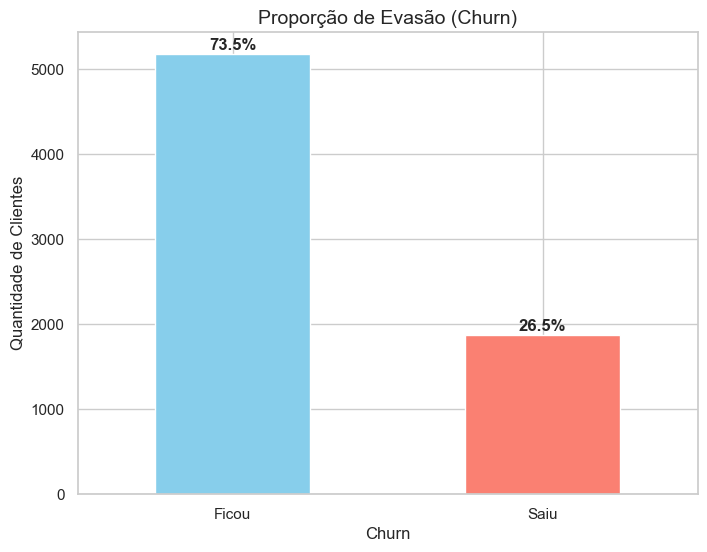

In [105]:
contagem = df['Churn'].value_counts().loc[['Ficou', 'Saiu']]
total = contagem.sum()

plt.figure(figsize=(8, 6))
grafico = contagem.plot(kind='bar', color=['skyblue', 'salmon'])

for i, valor in enumerate(contagem):
    porcentagem = (valor / total) * 100
    plt.text(i, valor + 50, f'{porcentagem:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.title('Proporção de Evasão (Churn)', fontsize=14)
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)

plt.savefig('grafico_proporcao_churn.png', dpi=300, bbox_inches='tight')

plt.show()

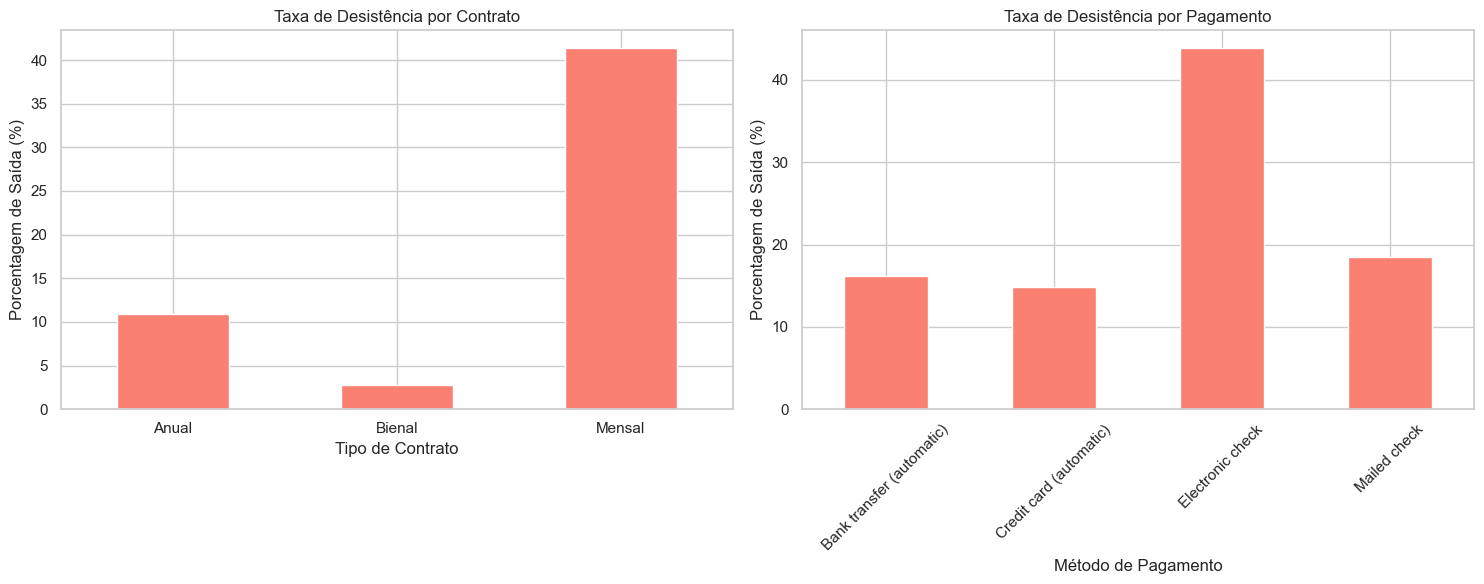

In [108]:
taxa_contrato = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()['Saiu'] * 100
taxa_pagamento = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()['Saiu'] * 100

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
taxa_contrato.plot(kind='bar', color='salmon')
plt.title('Taxa de Desistência por Contrato')
plt.ylabel('Porcentagem de Saída (%)')
plt.xlabel('Tipo de Contrato')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
taxa_pagamento.plot(kind='bar', color='salmon')
plt.title('Taxa de Desistência por Pagamento')
plt.ylabel('Porcentagem de Saída (%)')
plt.xlabel('Método de Pagamento')
plt.xticks(rotation=45) 

plt.tight_layout()

plt.savefig('taxas_desistencia.png', dpi=300, bbox_inches='tight')

plt.show()

In [74]:
dados_comparativos = df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()

dados_finais = dados_comparativos.loc[['Ficou', 'Saiu']].copy()
dados_finais.columns = ['Tempo de Casa (Meses)', 'Gasto Mensal (R$)', 'Total Gasto (R$)']

print("--- COMPARATIVO PARA O RELATÓRIO ---")
print(dados_finais.round(2))

print("-" * 60)

tempo_dif = dados_finais.loc['Saiu', 'Tempo de Casa (Meses)'] - dados_finais.loc['Ficou', 'Tempo de Casa (Meses)']
mensal_dif = dados_finais.loc['Saiu', 'Gasto Mensal (R$)'] - dados_finais.loc['Ficou', 'Gasto Mensal (R$)']
total_dif = dados_finais.loc['Saiu', 'Total Gasto (R$)'] - dados_finais.loc['Ficou', 'Total Gasto (R$)']

print("--- DIFERENÇA PARA O SEU TEXTO ---")
print(f"Tempo: {int(round(tempo_dif))} meses")
print(f"Mensalidade: R$ {mensal_dif:.2f}")
print(f"Total: R$ {total_dif:.2f}")

--- COMPARATIVO PARA O RELATÓRIO ---
       Tempo de Casa (Meses)  Gasto Mensal (R$)  Total Gasto (R$)
Churn                                                            
Ficou                  37.57              61.27           2549.91
Saiu                   17.98              74.44           1531.80
------------------------------------------------------------
--- DIFERENÇA PARA O SEU TEXTO ---
Tempo: -20 meses
Mensalidade: R$ 13.18
Total: R$ -1018.12


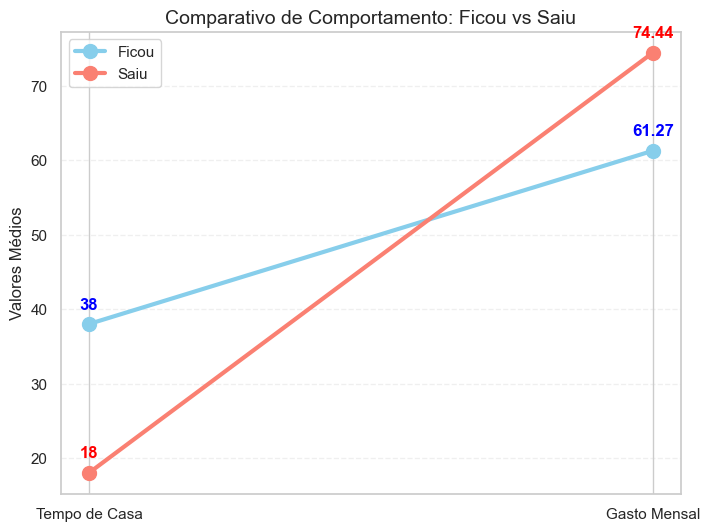

In [109]:
metricas = ['Tempo de Casa', 'Gasto Mensal']
ficou = [38, 61.27]
saiu = [18, 74.44]

plt.figure(figsize=(8, 6))

plt.plot(metricas, ficou, marker='o', linewidth=3, markersize=10, label='Ficou', color='skyblue')
plt.plot(metricas, saiu, marker='o', linewidth=3, markersize=10, label='Saiu', color='salmon')

for i, valor in enumerate(ficou):
    plt.text(i, valor + 2, f'{valor}', ha='center', fontweight='bold', color='blue')

for i, valor in enumerate(saiu):
    plt.text(i, valor + 2, f'{valor}', ha='center', fontweight='bold', color='red')

plt.title('Comparativo de Comportamento: Ficou vs Saiu', fontsize=14)
plt.ylabel('Valores Médios')
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.legend()

plt.savefig('grafico_x_da_questao.png', dpi=300, bbox_inches='tight')

plt.show()

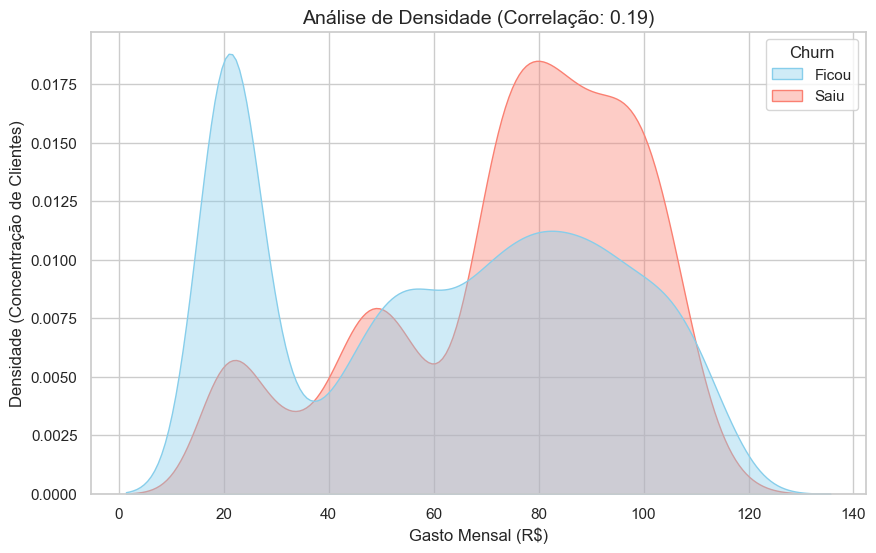

A correlação entre Gasto Mensal e Evasão é de: 0.19


In [103]:
df_analise = df.copy()
df_analise['Churn_Num'] = df_analise['Churn'].map({'Ficou': 0, 'Saiu': 1})

correlacao_valor = df_analise['MonthlyCharges'].corr(df_analise['Churn_Num'])

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_analise[df_analise['Churn'].isin(['Ficou', 'Saiu'])], 
    x='MonthlyCharges', 
    hue='Churn', 
    fill=True, 
    common_norm=False,
    palette={'Ficou': 'skyblue', 'Saiu': 'salmon'},
    alpha=0.4
)
plt.title(f'Análise de Densidade (Correlação: {correlacao_valor:.2f})', fontsize=14)
plt.xlabel('Gasto Mensal (R$)')
plt.ylabel('Densidade (Concentração de Clientes)')

plt.savefig('grafico_densidade.png', dpi=300, bbox_inches='tight')

plt.show()

print(f"A correlação entre Gasto Mensal e Evasão é de: {correlacao_valor:.2f}")

#📄Relatorio Final

## Introdução

Este relatório apresenta uma análise detalhada sobre a evasão de clientes (Churn) na *TelecomX*. Através do processamento de dados históricos, exploramos o comportamento dos consumidores e as variáveis demográficas e financeiras que precedem o cancelamento dos serviços. A análise foca em identificar padrões que diferenciam os clientes que permanecem na base daqueles que optam pelo desligamento.

--------------------------------------------------------------

## Objetivo

O propósito central deste projeto é converter dados brutos em inteligência de negócio. 

-- Os objetivos específicos incluem:

* Identificar Gatilhos: Determinar quais fatores (como preço e tempo de contrato) possuem maior correlação com a saída do cliente.

* Apoiar a Tomada de Decisão: Fornecer embasamento estatístico para que a diretoria possa implementar estratégias de retenção assertivas.

* Maximizar a Receita: Reduzir a taxa de Churn para estabilizar o fluxo de caixa e aumentar o valor do tempo de vida do cliente (LTV - Lifetime Value).

--------------------------------------------------------------

## Metodologia

A análise foi desenvolvida utilizando a linguagem Python e as bibliotecas Pandas (para manipulação de dados) e Seaborn/Matplotlib (para visualizações estatísticas). O processo incluiu:

-Tratamento de dados ausentes e conversão de tipos numéricos.

-Cálculo de correlação através da função corr().

-Análise de densidade e distribuição para comparar os perfis de clientes "Ficou" vs "Saiu".

--------------------------------------------------------------

## Visual e Insights

Abaixo estão os pontos críticos identificados através da análise visual dos dados:

-O Tamanho do Problema (Churn Atual)
Atualmente, a TelecomX enfrenta uma taxa de evasão de 26.5%.

Insight: Mais de um quarto da base de clientes cancelou o serviço, o que indica uma falha crítica na retenção inicial ou na percepção de valor dos planos oferecidos.

![Proporção de Evasão](grafico_proporcao_churn.png)

--------------------------------------------------------------

-A Barreira do Preço (Análise de Densidade)
O gráfico de densidade revela o "teto" de aceitação de preço do cliente.

Insight: A maior parte dos cancelamentos (curva salmão) ocorre quando a fatura está na faixa de R$ 70,00 a R$ 110,00. Por outro lado, clientes com faturas baixas (R$ 20,00) tendem a ser muito mais fiéis.

![Análise de Densidade de Gastos](grafico_densidade.png)

--------------------------------------------------------------

-O "X" da Questão: Tempo vs. Gasto

Este gráfico resume a fragilidade da base atual da TelecomX.
O Perfil do Churn: O cliente que sai tem, em média, apenas 18 meses de casa e paga caro (R$ 74,44).

O Perfil do Fiel: O cliente que fica tem o dobro de tempo de casa (38 meses) e paga uma mensalidade mais justa (R$ 61,27).

Conclusão: O risco é máximo no primeiro ano e meio de contrato para faturas de ticket alto.

![Gráfico X da Questão](grafico_x_da_questao.png)

--------------------------------------------------------------

## Análise Estatística (Correlação)

* Utilizando a função corr(), extraímos os coeficientes que regem a probabilidade de churn:

* Gasto Mensal (0.19): Correlação positiva. Quanto mais caro o plano, maior a tendência de saída.

* Tempo de Casa (-0.35): Correlação negativa forte. Indica que a fidelidade aumenta conforme o cliente amadurece na base; o tempo é um fator de proteção.

--------------------------------------------------------------

## Conclusão e Solução

-Conclusão

A análise comprova que a TelecomX enfrenta um problema de sensibilidade ao preço nos estágios iniciais do relacionamento com o cliente. Como vimos no "X da Questão", clientes com pouco tempo de contrato e gastos elevados são os mais propensos a abandonar a empresa. O tempo de casa atua como um "escudo" natural, porém, o custo mensal elevado anula essa proteção nos primeiros meses.

-Ações Estratégicas (Solução)

Para mitigar a evasão, propomos as seguintes ações:

Reestruturação da Oferta Inicial: Implementar descontos progressivos para novos clientes que entrarem em planos de ticket alto.

Plano de Blindagem (1º Ano): Criar uma régua de relacionamento intensiva para clientes com menos de 1 ano de casa, oferecendo benefícios antes que o preço cause o cancelamento.

Conversão para Contratos Longos: Baseado no gráfico de Taxas de Desistência, incentivar a migração do plano "Mensal" para planos "Anuais", que possuem fidelidade e menor índice de churn.
